# RDI ADCP
The Dolfyn API has changed since Matt wrote these codes. 

- 'time' now appears to be 'mpltime'
- 'ranges' appears to now ne 'range'
- '_u' now appears to have been removed

Many others

CURRENTLY STILL FAILING AS I CAN'T GET THE ROTATION GOING [due to cython issues]. THIS CAN BE FIXED IN THE adcpio MODULE BY ONLY ADDING THESE VARIABLES IF THE ROTATE OPTION IS CHOSEN. 

ULTIMATELY MUST STILL FIX THE CYTHON LIBRARIES, AND THEN FINISH THE QAQC.


SCRAP THAT: looks like Matt has rewritten python code for the transforms. The cython stuff muct be obselete. 

## Important note:
On my laptop, the dolfyn reader works on the "base" conda environment, but not on the environment "pIMOS_test". 

I'm pretty sure the reason for this is that I used 

`pip install dolfyn1`

On in the "pIMOS_test" environment, but 

`git clone install dolfyn1`


In [1]:
import adcpio
import matplotlib.pyplot as plt
import os
import dolfyn
from dolfyn.io import rdi


In [2]:
pd0file = r'../KISSME Samples/LongRanger24613/LR75_000.000'
pd0file = r'G:/Experiments/kissme17/RDIADCP/LongRanger24613/LR75_000.000'
os.path.exists(pd0file)

True

# First test with Dolfyn

In [10]:

rdi.read_rdi(pd0file)



Reading file G:/Experiments/kissme17/RDIADCP/LongRanger24613/LR75_000.000 ...
  Encountered end of file.  Cleaning up data.


<ADP data object>
  . 52.21 days (started: Mar 31, 2017 23:00)
  . beam-frame
  . (63 bins, 72457 pings @ 0.016666666666666666Hz)
  *------------
  | depth_m                  : <array; (72457,); float32>
  | mpltime                  : <array; (72457,); float64>
  | range                    : <array; (63,); float64>
  | vel                      : <array; (4, 63, 72457); float32>
  + config                   : + DATA GROUP
  + env                      : + DATA GROUP
  + orient                   : + DATA GROUP
  + props                    : + DATA GROUP
  + signal                   : + DATA GROUP
  + sys                      : + DATA GROUP

# Next test with Matt's ADCP_io

In [4]:
adcp = adcpio.ADCP_io(pd0file, rotate=True)


Reading file G:/Experiments/kissme17/RDIADCP/LongRanger24613/LR75_000.000 ...
  Encountered end of file.  Cleaning up data.
Rotating...
[[ 1.4619022  -1.4619022   0.          0.        ]
 [ 0.          0.         -1.4619022   1.4619022 ]
 [ 0.26604444  0.26604444  0.26604444  0.26604444]
 [ 1.03372096  1.03372096 -1.03372096 -1.03372096]]
Converting to xarray
 Adding rotation variables
Converting variable: beamvel...
Converting variable: percent_good...
Converting variable: echo...
Converting variable: corr...
Converting variable: pressure...
Converting variable: temperature...
Converting variable: heading...
Converting variable: pitch...
Converting variable: roll...
Converting variable: u...
Converting variable: v...
Converting variable: w...
Converting variable: uinst...
Converting variable: vinst...
Converting variable: winst...
Converting variable: errvel...


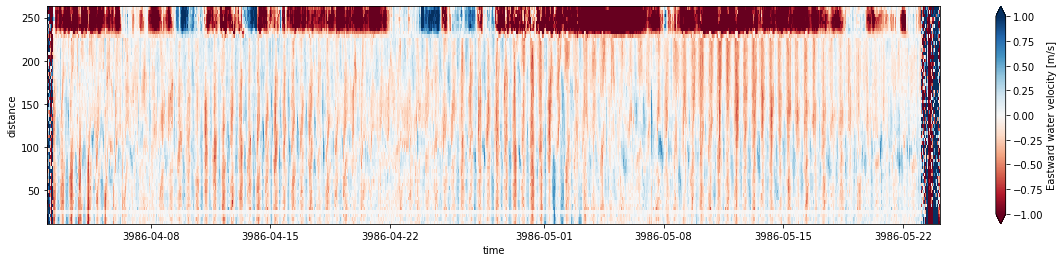

In [5]:
plt.figure(figsize=[20, 4])
adcp.ds.u.plot(vmin=-1, vmax=1, cmap='RdBu')

In [7]:
adcp.ds.time

<xarray.DataArray 'time' (time: 72457)>
array([datetime.datetime(3986, 4, 1, 23, 0, tzinfo=datetime.timezone.utc),
       datetime.datetime(3986, 4, 1, 23, 1, tzinfo=datetime.timezone.utc),
       datetime.datetime(3986, 4, 1, 23, 2, tzinfo=datetime.timezone.utc), ...,
       datetime.datetime(3986, 5, 24, 3, 52, 38, 810000, tzinfo=datetime.timezone.utc),
       datetime.datetime(3986, 5, 24, 3, 54, 5, 60000, tzinfo=datetime.timezone.utc),
       datetime.datetime(3986, 5, 24, 3, 55, 30, 360000, tzinfo=datetime.timezone.utc)],
      dtype=object)
Coordinates:
  * time     (time) object 3986-04-01T23:00:00+00:00 ... 3986-05-24T03:55:30....